In [1]:
#官方網站：http://www.statsmodels.org/devel/index.html

In [ ]:
import statsmodels.api as sm
import pandas
import numpy as np
from patsy import dmatrices

# Data

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [5]:
df = df.dropna()  #將有missing value的row給drop掉
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


# Design matrices

In [7]:
#接著需要建立兩個matrix，一個是dependent variable，另一個是independent variabels
#Ordinary least squares regression: beta = (X'X)^{-1} X'y
#pasty讓你可以用類似R的function參數代入
#可用pandas data frame
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [9]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [10]:
X[:3]
#split the categorical Region variable into a set of indicator variables
#added a constant to the exogenous regressors matrix
#returned pandas DataFrames instead of simple numpy arrays

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


# Model fit and summary

In [12]:
#建模三步驟
#1.Use the model class to describe the model  選定要用的模型
#2.Fit the model using a class method  用模型提供的方法跑
#3.Inspect the results using a summary method  用summary看結果


mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 03 May 2017   Prob (F-statistic):           1.07e-05
Time:                        14:05:53   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [13]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [14]:
res.rsquared

0.33795086919288198

# Diagnostics and specification tests

In [15]:
#Rainbow test for linearity (the null hypothesis is that the relationship is properly modelled as linear)
sm.stats.linear_rainbow(res)

#回傳第一個值是 F-statistic (F值)，第二個是 p-value (P值)

(0.84723399761569129, 0.69979655436216426)

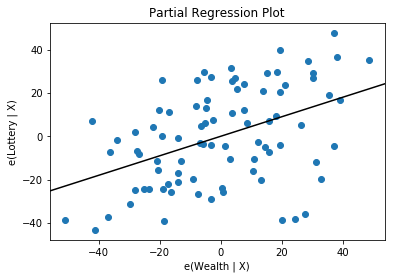

In [16]:
#將圖形畫出
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],data=df, obs_labels=False)

# Fitting models using R-style formulas

In [18]:
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [19]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()  #刪掉遺漏值的row
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [20]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
#import statsmodels.api as sm
#跟上面的比較：mod = sm.OLS(y, X)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 03 May 2017   Prob (F-statistic):           1.07e-05
Time:                        19:27:44   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

# Categorical variables

In [21]:
#patsy‘s default is also to include an intercept, so we automatically dropped one of the Region categories.
res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
print(res.params)

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


# Operators

In [22]:
# “~” separates the left-hand side of the model from the right-hand side
# “+” adds new columns
# “-” sign can be used to remove columns/variables

res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region) -1 ', data=df).fit()  #intercept被drop掉了
print(res.params)

C(Region)[C]    38.651655
C(Region)[E]    23.223870
C(Region)[N]    28.634694
C(Region)[S]    34.103399
C(Region)[W]    28.560379
Literacy        -0.185819
Wealth           0.451475
dtype: float64


In [24]:
# Multiplicative interactions 參數的相乘
res1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit()  #參數只剩下相乘的答案
res2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()  #相乘的參數 + 原本的參數
print(res1.params)
print()
print(res2.params)

Literacy:Wealth    0.018176
dtype: float64

Literacy           0.427386
Wealth             1.080987
Literacy:Wealth   -0.013609
dtype: float64


# Functions

In [25]:
res = smf.ols(formula='Lottery ~ np.log(Literacy)', data=df).fit()  #import numpy as np ==> np.log() = numpy.log() = 取自然對數
print(res.params)

Intercept           115.609119
np.log(Literacy)    -20.393959
dtype: float64


In [26]:
def log_plus_1(x):
    return np.log(x) + 1.

print(res.params)

Intercept           115.609119
np.log(Literacy)    -20.393959
dtype: float64


# Using formulas with models that do not (yet) support them

In [28]:
#To generate numpy arrays:

import patsy
f = 'Lottery ~ Literacy * Wealth'
y, X = patsy.dmatrices(f, df, return_type='dataframe')  #第二參數是資料來源
print(y[:5])
print()
print(X[:5])

#To generate pandas data frames:  #和上面一樣，網站有誤？

f = 'Lottery ~ Literacy * Wealth'
y, X = patsy.dmatrices(f, df, return_type='dataframe')
print(y[:5])
print(X[:5])

   Lottery
0     41.0
1     38.0
2     66.0
3     80.0
4     79.0

   Intercept  Literacy  Wealth  Literacy:Wealth
0        1.0      37.0    73.0           2701.0
1        1.0      51.0    22.0           1122.0
2        1.0      13.0    61.0            793.0
3        1.0      46.0    76.0           3496.0
4        1.0      69.0    83.0           5727.0


In [30]:
print(smf.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Wed, 03 May 2017   Prob (F-statistic):           1.32e-06
Time:                        19:43:58   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

# endog and exog

In [ ]:
endog 跟 exog 在 statsmodels 代表者 dependet 跟 independet variables

endog	                     exog
y	                         x
y variable	                 x variable
left hand side (LHS)	     right hand side (RHS)
dependent variable	         independent variable
regressand	                 regressors
outcome	                     design
response variable	         explanatory variable

# Import Paths and Structure

In [31]:
#最簡單的import方式，包含了大部分的功能
import statsmodels.api as sm

# statsmodels.base.model.Model

In [32]:
#最基本的三種方法
# fit()	Fit a model to data.
# from_formula(formula, data[, subset, drop_cols])	Create a Model from a formula and dataframe.
# predict(params[, exog])	After a model has been fit predict returns the fitted values.

# 進階篇：各種迴歸模型範例  

# Linear Regression

In [33]:
#準備資料
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

#跑迴歸
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Wed, 03 May 2017   Prob (F-statistic):            0.00157
Time:                        20:15:14   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

# Generalized Linear Models

In [34]:
#準備資料
import statsmodels.api as sm

data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

#跑迴歸
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())  #範例這邊使用了gamma family model
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                0.00358428317349
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Wed, 03 May 2017   Deviance:                     0.087389
Time:                        20:16:10   Pearson chi2:                   0.0860
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122        -0.040     0.005
x1          4.962e-05   1.62e-05      3.060      0.0

# Generalized Estimating Equations

In [35]:
#準備資料
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('epil', package='MASS').data
fam = sm.families.Poisson()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee("y ~ age + trt + base", "subject", data, cov_struct=ind, family=fam)

#跑迴歸
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                    51
Date:                     Wed, 03 May 2017   Scale:                           5.087
Covariance type:                    robust   Time:                         20:21:39
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112        -0.134

# Robust Linear Models

In [37]:
#準備資料
import statsmodels.api as sm

data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)
rlm_model = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())

#跑迴歸
rlm_results = rlm_model.fit()
print(rlm_results.params)
print()
print(rlm_results.summary())

[-41.02649835   0.82938433   0.92606597  -0.12784672]

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 03 May 2017                                         
Time:                        20:45:43                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

# Linear Mixed Effects Models (Random effect model)

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

mdf = md.fit()
print(mdf.summary())

C:\Users\BIG DATA\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:160: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._params = np.zeros(self.k_tot)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3668   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.180 17.269
Time          6.942    0.033 207.939 0.000  6.877  7.008
Intercept RE 40.399    2.166                            



# Regression with Discrete Dependent Variable

In [39]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog)

# Logit Model
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)

logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 May 2017   Pseudo R-squ.:                  0.3740
Time:                        21:03:53   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008       -22.687    -3.356
x1             2.8261      1.

# ANOVA

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car", cache=True) # load data

data = moore.data
data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic

moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit() #先跑了ordinary least squares

table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


# Statistics stats

In [ ]:
#各種不同的檢定方法
# http://www.statsmodels.org/devel/stats.html

In [ ]:
# index 快速查詢
# http://www.statsmodels.org/devel/genindex.html